In [43]:
from models import RandomPath

In [44]:
# Time period (in years) of the underlying price path. Trajectories are generated in the [0, T] interval
T = 1 

#Trajectories are not purely continuous. There are price points every delta_t 
delta_t = 1.0 / (365) # daily prices

# Volatility of the underlying
vol = 0.2 # 20% volatility

# On average, underlying's return is r * delta_t between t and t + delta_t ==> dSt / St = r * dt + vol * dWt (Wt is a standard brownian motion)
r = 0.01

# Initial price of underlying
S0 = 10

In [45]:
random_paths = RandomPath(model="black-scholes", T=T, delta_t=delta_t, vol=vol, r=r, S0=S0)

In [46]:
trajectories = random_paths.generate(n_simulations=10)

<AxesSubplot:>

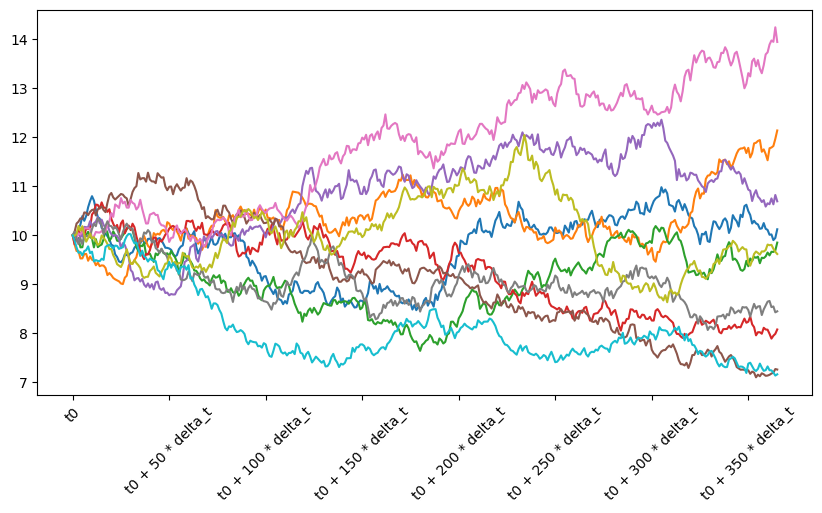

In [47]:
trajectories.T.plot(legend=False, figsize=(10,5), rot=45)

In [48]:
from models import Call

ImportError: cannot import name 'Call' from 'models' (C:\Users\ilepoutre\Desktop\ivan\GitHub\Basic-Autocall-Pricing\models.py)

In [ ]:
call = Call(T=1, K=11)
random_trajectories = RandomPath(model="black-scholes", T=call.T, delta_t=1./(2*365), vol=vol, r=r, S0=S0)